In [2]:
import numpy as np
import matplotlib.pyplot as plt

# RSH 降雨参数
## 参数顺序 A, C, P, b, n, r

In [30]:
re=np.load('./Step2_Rainfall_design/RSH/Parameter_east.npy')
rw=np.load('./Step2_Rainfall_design/RSH/Parameter_west.npy')

In [31]:
for i in [0,1,3,4,6,7]:
    print(re[i])
    print(rw[i])
    print('*'*30)

[30.    1.18  1.   18.    0.91  0.5 ]
[20.    1.15  1.   18.    0.87  0.5 ]
******************************
[20.    1.15  1.   16.    0.91  0.5 ]
[30.    1.16  1.   16.    0.92  0.5 ]
******************************
[30.    1.16  3.   18.    0.89  0.5 ]
[20.    1.02  3.   19.    0.92  0.5 ]
******************************
[20.    1.04  3.   18.    0.87  0.5 ]
[30.    0.94  3.   17.    0.87  0.5 ]
******************************
[30.    1.01  5.   21.    0.9   0.5 ]
[20.    1.08  5.   19.    0.91  0.5 ]
******************************
[20.    1.15  5.   16.    0.86  0.5 ]
[30.    0.94  5.   17.    0.87  0.5 ]
******************************


# RN 降雨参数
## 参数顺序 A, C, P, b, n, r

In [4]:
r21=np.load('./Step2_Rainfall_design/RN/Parameter_2top_1.npy')
r22=np.load('./Step2_Rainfall_design/RN/Parameter_2top_2.npy')

In [5]:
r21

array([[20.  ,  1.01,  1.  , 20.  ,  0.87,  0.2 ],
       [30.  ,  1.02,  5.  , 21.  ,  0.93,  0.2 ],
       [30.  ,  1.16,  5.  , 18.  ,  0.86,  0.2 ]])

In [6]:
r22

array([[30.  ,  0.97,  5.  , 17.  ,  0.94,  0.8 ],
       [20.  ,  1.14,  1.  , 16.  ,  0.93,  0.8 ],
       [30.  ,  0.98,  5.  , 20.  ,  0.86,  0.8 ]])

In [27]:
r31=np.load('./Step2_Rainfall_design/RN/Parameter_3top_1.npy')
r32=np.load('./Step2_Rainfall_design/RN/Parameter_3top_2.npy')
r33=np.load('./Step2_Rainfall_design/RN/Parameter_3top_3.npy')

In [28]:
for i in [1,2,4]:
    print(r31[i])
    print(r32[i])
    print(r33[i])
    print('*'*30)


[20.    1.14  1.   20.    0.89  0.1 ]
[30.    0.99  5.   18.    0.9   0.5 ]
[20.    1.18  1.   17.    0.89  0.9 ]
******************************
[20.    0.96  1.   17.    0.87  0.1 ]
[20.    1.12  1.   19.    0.86  0.5 ]
[30.    1.06  5.   17.    0.87  0.9 ]
******************************
[30.    1.19  5.   17.    0.93  0.1 ]
[20.    0.95  1.   17.    0.86  0.5 ]
[30.    0.97  5.   19.    0.91  0.9 ]
******************************


# 绘制降雨图 Fig.3

In [8]:
train_rain=np.load('./Step2_Rainfall_design/training_raindata.npy')
real_rain=np.load('./Step2_Rainfall_design/RealRain/real.npy')

tr=[]
for i in range(10):
    tem=[]
    for j in range(train_rain[i].shape[0]):
        tem.append(float(train_rain[i][j][1]))
    tr.append(tem)
    
rtr=[]
for i in range(4):
    tem=[]
    for j in range(real_rain[i].shape[0]):
        tem.append(float(real_rain[i][j][1]))
    rtr.append(tem)

Bar图

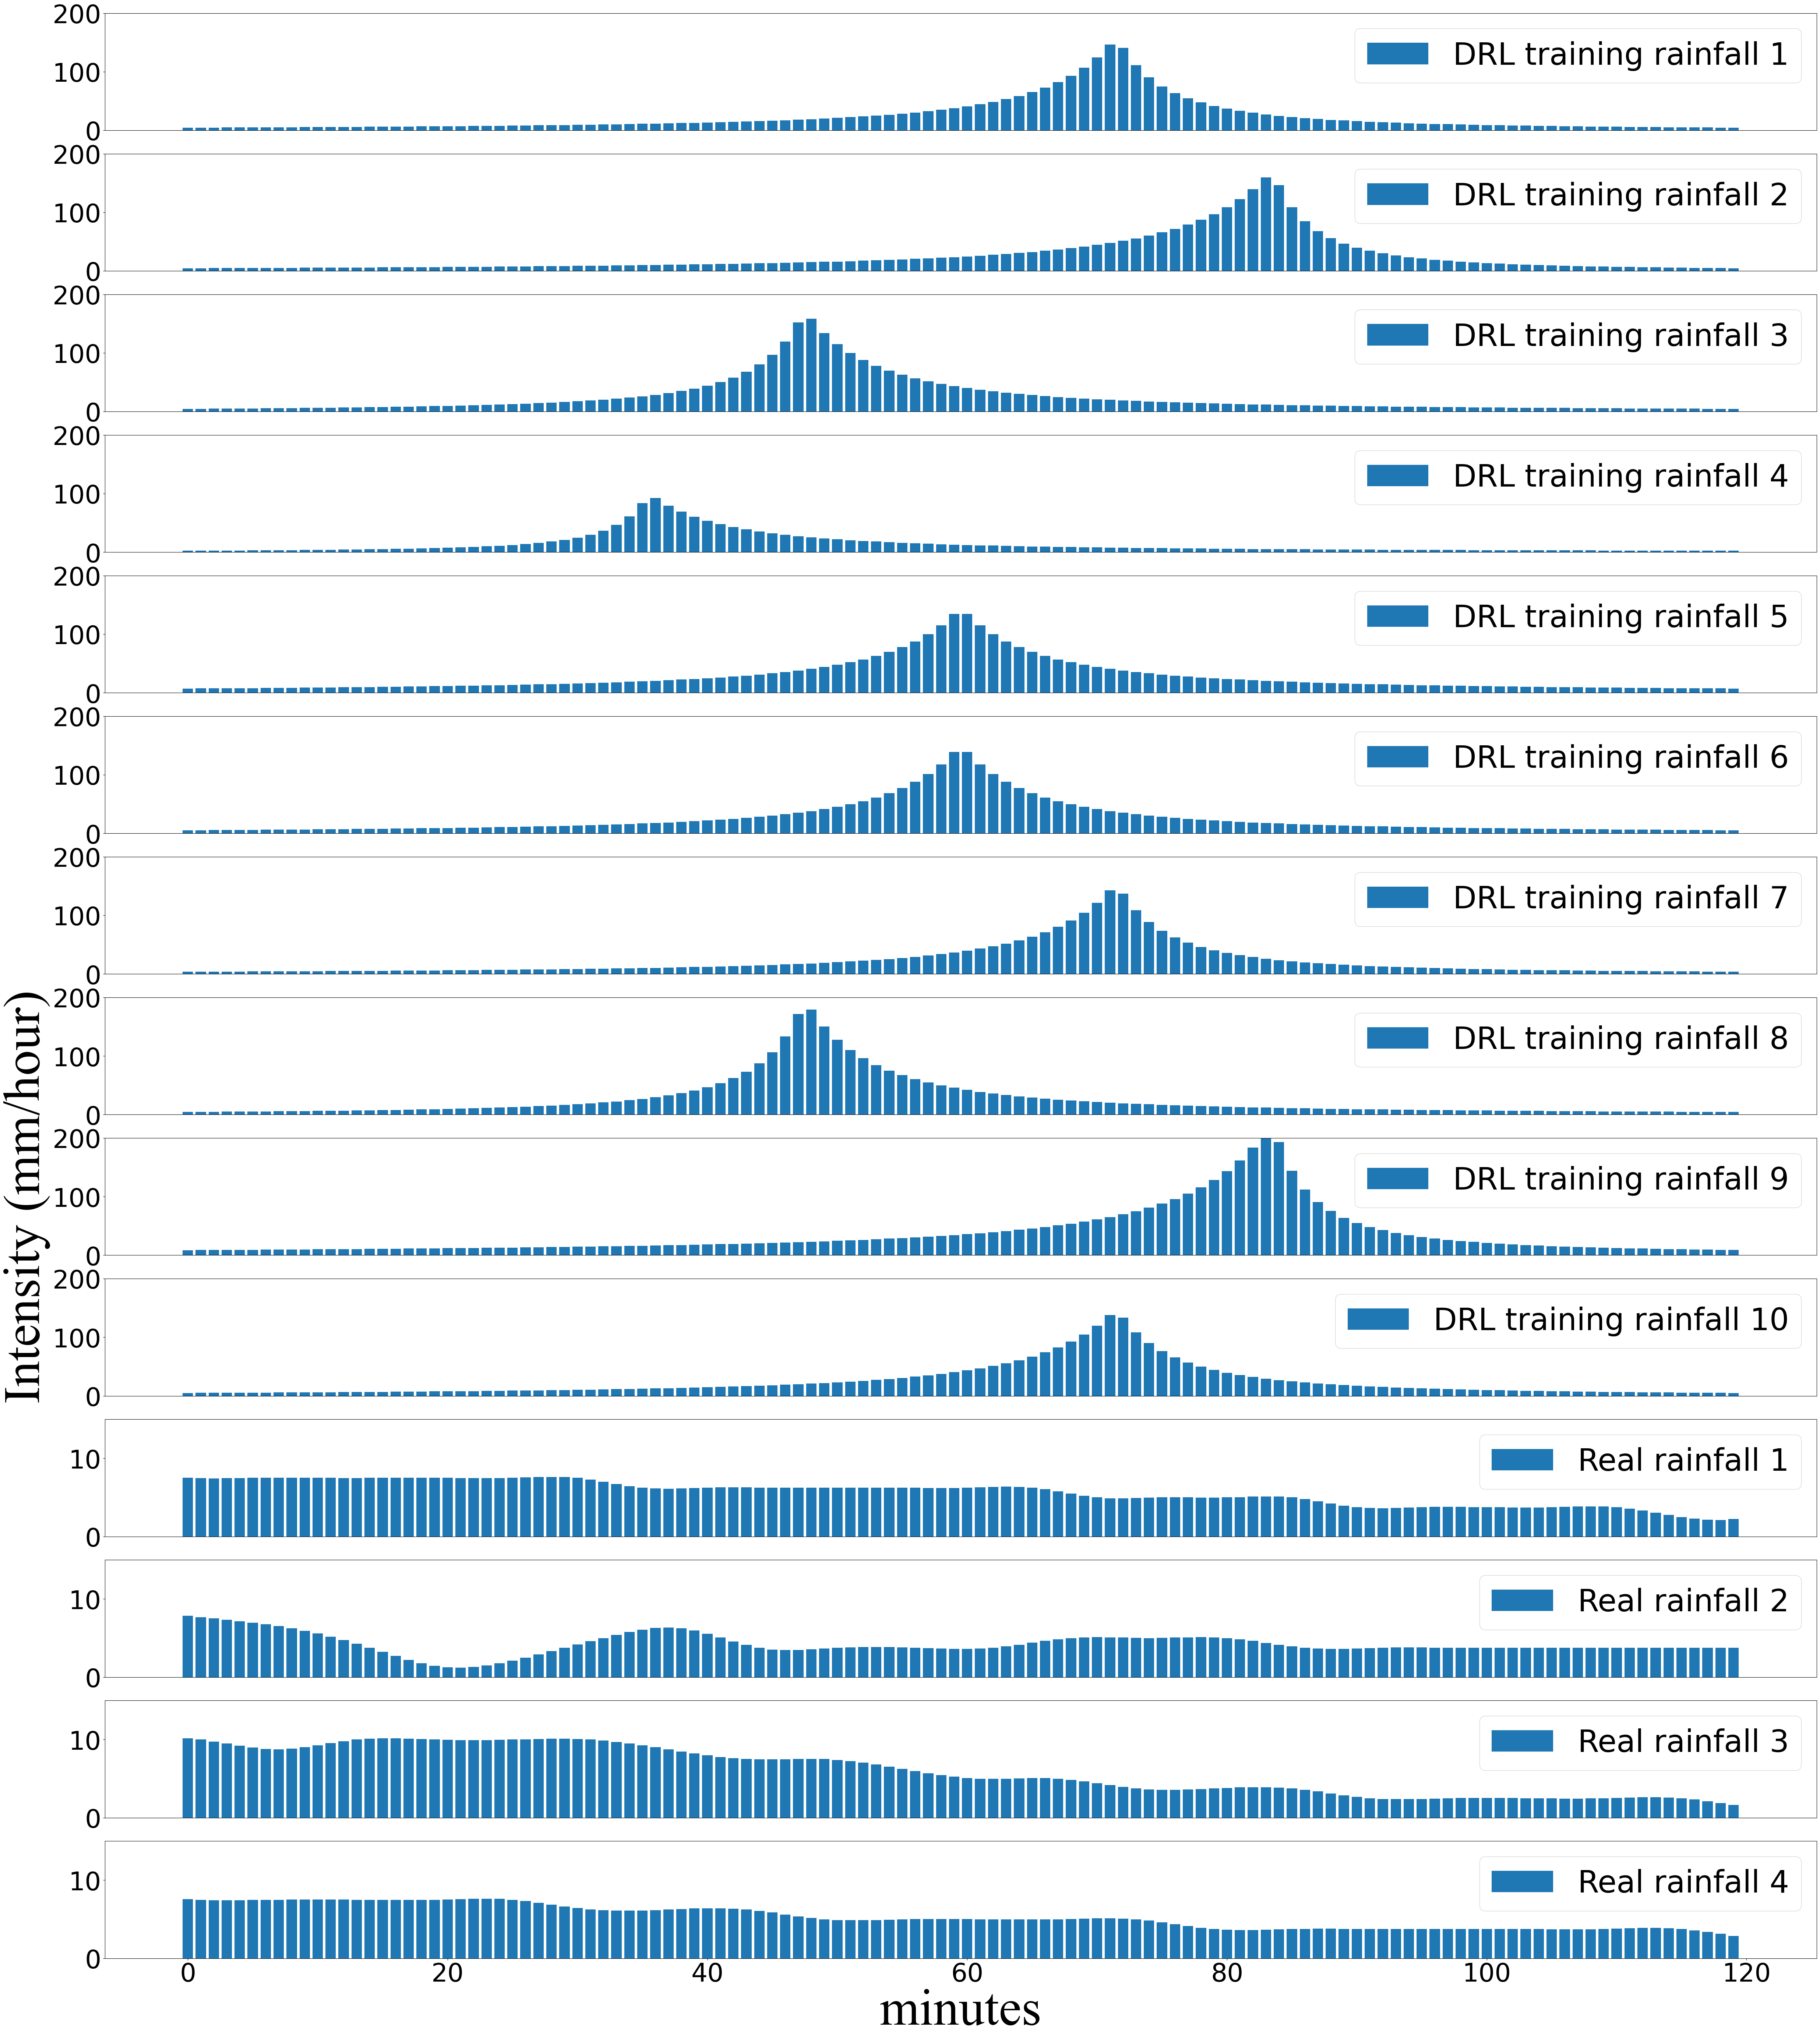

In [64]:
font1 = {'family':'Times New Roman','weight':'normal','size':60}
font2 = {'family':'Times New Roman','weight':'normal','size':100}
font3 = {'family':'Times New Roman','weight':'normal','size':50}

fig,ax=plt.subplots(14,1,figsize=(60,70),dpi=100)

x=[i for i in range(120)]
# DRL training rainfall
for i in range(10):
    ax[i].bar(x,tr[i],label='DRL training rainfall '+str(i+1))
    ax[i].legend(fontsize=font1['size'])
    #ax[i].set_title('DRL training rainfall '+str(i+1),font=font1)
    ax[i].set_ylim(ymin = 0, ymax = 200)
    ax[i].tick_params(labelsize=font3['size'])
    ax[i].set_xticks([])
    if i ==8:
        ax[i].set_ylabel('Intensity (mm/hour)',font=font2)

# Real rainfall
for i in range(4):
    ax[i+10].bar(x,rtr[i],label='Real rainfall '+str(i+1))
    ax[i+10].legend(fontsize=font1['size'])
    #ax[i+10].set_title('Real rainfall '+str(i+1),font=font1)
    ax[i+10].set_ylim(ymin = 0, ymax = 15)
    #ax[i+10].set_ylabel('Intensity (mm/hour)',font=font2)
    ax[i+10].tick_params(labelsize=font3['size'])
    if i == 3:
        ax[i+10].set_xlabel('minutes',font=font2)
    else:
        ax[i+10].set_xticks([])
        
plt.savefig('Fig3.png',dpi=100)